# <u>Lab 2: Signal Jamming</u>

* PARTNER LAB - you will be working with a partner through the entirety of this lab. You will only have to turn in one solution for each team.


Midshipmen NAMES for Lab:
-
-


In this lab you will learn 
- how jamming of a signal works, both an analog and a digital signal

To turn in to <a href="submit.cs.usna.edu">submit</a>:
- your version of this jupyter notebook with code filled out
  
To turn in to google classroom (<a href="https://classroom.google.com/c/ODM3Nzg4MzY5NDk0?cjc=r6qpxfgb" target="_blank">1133</a> or <a href="https://classroom.google.com/c/ODM3Nzg3MjA3NjAw?cjc=63thu5v4" target="_blank">3333</a>):
- google doc of answered questions - your answers must have justification (This is a large portion of your grade)
- GenAI transcript

## <span style="color:#03fcd7">Jamming an analog signal</span> (75% of Grade)
Listen to the following wav file. You will note that someone is speaking. Can you think of a way to add to the signal so you cannot understand the person speaking? In other words, you cannot change the original signal, but you can add another signal onto it:
      
      voice signal + your signal = unintelligible signal

In [ ]:

#pip install 
#pip install audioop-lts



In [1]:
# import librariesLook at the spectogram of the signal and recall which frequencies our voice range is in (and if you do not remember, google it!).


#%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# import local library
import sys

# path for class directory (will have data and libraries)
class_dir = "/SI486H/"
sys.path.append(class_dir)

# import library for sound functions
from sound_lib import *

In the library sound_lib, you will see a function "grab_raw_data".
The function is defined as

<center><span style="color:#03fcd7">grab_raw_data(file_path, format="mp4)</span></center>

and returns 

<center><span style="color:pink">sample rate and the sound data</span></center>

Use this function to obtain both the sampling rate and the data for the file.

In [2]:
# https://www.moviesoundclips.net/sound.php?id=123  -- vizzini quote
path = class_dir + "sound_files/blunders.wav"

In [3]:
# read in the signal rate and the data
# YOUR CODE HERE
sample_rate, data = grab_raw_data(path, format="wav")

In the library sound_lib, you will see a function "play_raw_data".
The function is defined as

<center><span style="color:#03fcd7">play_raw_data(data, sample rate)</span></center>

and returns 

<center><span style="color:pink">None</span></center>

This function will play the data on your local speaker.
    
Use this function to play the data you acquired.

In [7]:
# play the data
# YOUR CODE HERE
play_raw_data(data, sample_rate)

KeyboardInterrupt: 

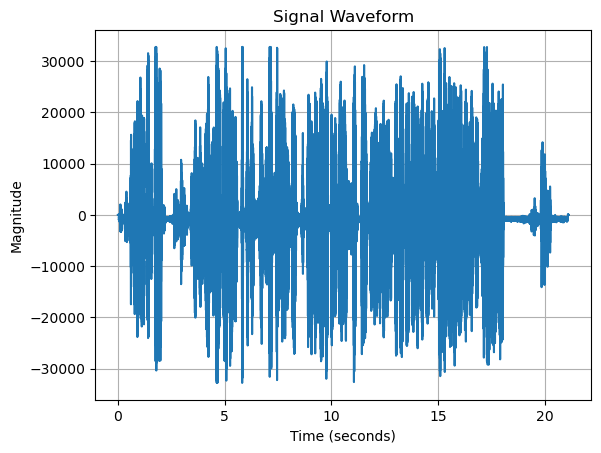

(506880,)


In [9]:
# Plot the signal with time on the x-axis and magnitude on the y-axis. Make sure you label
# YOUR CODE HERE
num_samples = len(data)

time = np.arange(num_samples) / sample_rate # Used Gemini here

plt.figure()
plt.plot(time, data)


plt.xlabel("Time (seconds)")
plt.ylabel("Magnitude")
plt.title("Signal Waveform")
plt.grid(True)
plt.show()

print(data.shape)

<b>Question:</b> (Put the answers in a google doc with justification.)

- Looking at the signal, what are some ways you can think of to obfuscate it?

- Try your idea out. Did it work? Do you still hear anything? If you still hear the quote, why do you think that is?

In [ ]:
#YOUR CODE HERE to help you answer the above questions
print(sample_rate)
data_obf1 = data
print("original data sample:")
for i in range(24000,24020):
    print(data[i])

#obfuscation
sign = np.random.choice([-1, 1])

print("obfuscated data sample:")
for i in range(0, len(data_obf1)):
    data_obf1[i] = data_obf1[i] + (data_obf1[i] * np.random.random() * 0.1 * sign)

for i in range(24000,24020):
    print(data_obf1[i])

#test it out
play_raw_data(data_obf1, sample_rate)

24000
original data sample:
51
522
5543
1170
3542
4772
63
1380
4815
69
6660
8891
93
506
5153
2574
2552
3928
5078
2659
obfuscated data sample:


ValueError: setting an array element with a sequence.

<details>
  <summary><b>Click here for a hint</b></summary>
  <p>Try adding noise using the function np.random.random. (Feel free to google the function to understand how to use it)</p>
</details>

In [ ]:
#YOUR CODE HERE to help you answer the above questions after using hint

Are you still hearing some words even after applying the hint? Why do you think that is?

- Look at the spectogram of the signal and recall which frequencies our voice range is in (and if you do not remember, google it!).

In [ ]:
# Plot the spectogram of the signal
#YOUR CODE HERE


<b>Questions</b> (Put the answers in a google doc with justification.)
- What is the frequency range that we are interested in (where do human voices dwell)?
- Are you seeing harmonics?
- Which frequencies should we add noise directly to? (Read the below to help you answer this question)

Navigating the problem:

What can we do? Well, looking at the frequency plot, we see that there are certain frequencies that still stand out.
it is like hearing a tuba play in the midst of violins playing random notes-- you can't hear a specific violin, 
but the tuba is in a different pitch range (i.e. frequency)
so we need to add "tubas", that is noise to the frequencies that are highlighted above.

In [ ]:
# Plot the spectogram of the signal but this time within the range you dictated in your answer to the above
#YOUR CODE HERE

In [ ]:
# create a signal with the frequency(ies) that should have noise added to it
# NOTE: the signal should be the same length as the data
# HINT: duration = len(data)//sr; times = np.linspace(0, duration, num=len(data))
# YOUR CODE HERE



# Your signal currently is a beautiful sine wave. Now using the function np.random.random, multiply the amplitudes of that sound wave with
# white noise - i.e. random gaussian 
# YOUR CODE HERE




In [ ]:
# create frequency graph - spectogram of your created signal (with noise)
# YOUR CODE HERE

In [ ]:
# create frequenc y graph - spectogram of your created signal (with noise) + original data
# YOUR CODE HERE


In [ ]:
# play the sound snippet with the noise added onto it
# YOUR CODE HERE



# if you still hear some of the speech, up the amplitude of your signal before multiplying it by noise.

## <span style="color:#03fcd7">Jamming a digital signal</span> (25% of Grade)

Consider a digital signal sent by a remote, e.g. remote control car, key fob. The majority of these signals are digital, i.e. the message is composed of 0s and 1s. Depending on the underlying code of the message, even one bit flip can interrupt the reading of the message. (For the interested reader, the mathematical theory of correcting bit errors is coding theory. In the engineering world it is called FEC - forward error correcting.)

Take a look at the following signal:



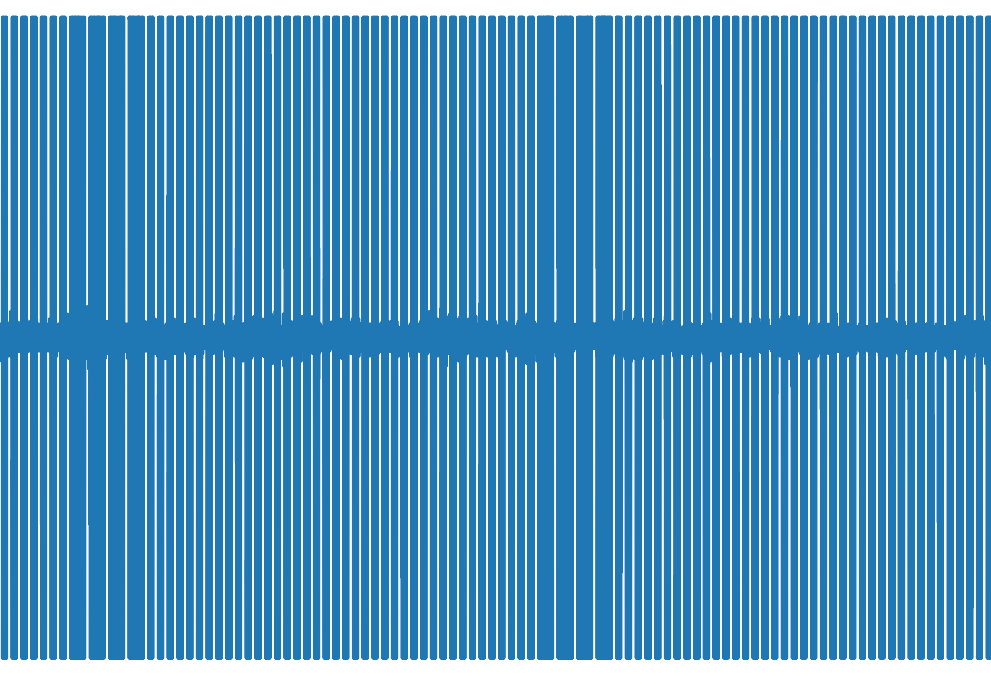

In [ ]:
from IPython.display import Image, display
display(Image(filename="pics/car_down.png", width=500))

Do you see a pattern? This signal occurs when pushing "down" on Dr. Knoll's remote control for her toy Lamborghini. (She would like to point out that if any student becomes rich in the future, she would not mind a real Lamborghini.)

The message of the signal can be easily read off: 
<center>'11110111101111011110' and then '10' repeated 40 times.</center> 

You will note that the signal is just pulsing on and off for a different duration of time. 

Jamming a digital signal consists of two parts:
- Making the "Noise" loud enough to interrupt the reception of the signal.
- Flipping enough of the message bits. Make it so that the decoder can not figure out the message that was intended. 
    - On many occasions, the number of bit flips required is unknown. So, we have to play around with it or just overdo it.


In [ ]:
# load the signal car_down.npy from the directory lab2 inside the class_dir using the function np.load
# YOUR CODE HERE

# visualize the data on a time/amplitude plot - you may have to play with the boundaries a little bit
# YOUR CODE HERE

<b>QUESTIONS:</b> (Put the answers in a google doc with justification.)

- Can you think of a way to add to the signal so that the remote control car cannot understand the signal? In other words, you cannot change the original signal, but you can add another signal onto it:
      
<center><i> remote signal + your signal = unintelligible signal</i></center>

  <b> Write down your idea in the google doc and try your idea out below.</b>

In [ ]:
#YOUR CODE HERE to help you answer the above questions


<details>
  <summary><b>Click here for a hint</b></summary>
  <p>Try adding the carrier signal, i.e. a signal with the same frequency, but it continuously being on. Play around with the amplitudes</p>
</details>

In [ ]:
#YOUR CODE HERE to help you answer the above questions after using hint



If you still are stuck, BUT DONT click on this until you at least tried something above!

<details>
  <summary><b>Click here for more hints</b></summary>
    <ol>
<li> Find the frequency of the signal.
<li> Create a complex signal (one with the imaginary component and a real component) with that frequency
<li> Look below about signal to noise ratio. Your signal to noise ratio must be small to trick the receiver
</li></ol>
</details>

In [ ]:
#YOUR CODE HERE


In [ ]:
# view signal in time/amplitude realm
# YOUR CODE HERE

### SIGNAL TO NOISE RATIO

Note: you are still able to see the signal easily if you add a sine wave with the same amplitude. Why is this? Well, it is called the signal to noise ratio. You want the receiver on the other end to not even have a chance of knowing if the signal is a 1 or 0. So, if the signal to noise ratio is small enough (say, 1/10), then there is a chance the receiver will not decode correctly

Signal to Noise Ratio:
$$SNR = 20 \cdot\log_{10} \left( \frac{RMS_{signal}}{RMS_{noise}} \right)$$

where $RMS$ is the root mean square of the data:

$$\begin{align} RMS & = \sqrt{ mean((s_1^2,s_2^2, \ldots, s_n^2))}\\
                    & = \sqrt{ \left(\sum_{i=1}^n s_i^2\right)/n} \end{align}$$
                    
So, lets consider jamming. What do we need in order to be able to jam? We need the "noise" to be greater than the signal.

<b>QUESTIONS:</b> (Put the answers in a google doc with justification.)
- What is the RMS of both signals (your signal and the remote signal)
- What is the signal to noise ratio?
- Do you think it will be strong enough?

Once you think you have a signal that is good enough, submit it to google classroom. We are going to try these out!! 
- save off the signal.  

In [ ]:
# Compute the RMS of the original signal and of your signal:
# YOUR CODE HERE  
# Note: np.mean and np.square might help

In [ ]:
# Compute the Signal to Noise Ratio:
# YOUR CODE HERE

In [ ]:
# Before you submit your signal, gnuradio automatically applies the carrier signal to the file. 
# This means, you should center your signal around 1 Hz. 
# That is, if your signal has a sinusoid at 20Hz, put it back to 1 Hz and the carrier signal will bring it back up to 20 Hz.

signal.astype("complex").tofile("teamname.dat")

# this will save your file to the directory.
# Submit this file to the google classroom.